In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style=('whitegrid')

In [5]:
df = pd.read_csv('..\data\players_22.csv', low_memory=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_13636\1006819348.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\players_22.csv', low_memory=False)


In [6]:
df_copy = df.copy()

In [7]:
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']]
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [8]:
df['player_positions'].str.split(',', expand=True)[0]

0         RW
1         ST
2         ST
3         LW
4         CM
        ... 
19234    CDM
19235     CM
19236     CM
19237     ST
19238    CAM
Name: 0, Length: 19239, dtype: object

In [9]:
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]
df.dropna(inplace=True)
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [10]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba', 'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué', 'P. Kimpembe', 'M. Maignan', 'Coutinho', 'G. Wijnaldum', 'R. James', 'B. Chilwell', 'Roberto', 'T. Tissoudali', 'Y. Nakayama', 'M. Crépeau', 'J. Corona', 'C. Richards', 'T. Werner', 'N. González', 'J. Correa']
eliminar_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(eliminar_index, axis=0, inplace=True)

In [11]:
teams_worldcup = ['Qatar','France', 'Brazil', 'Germany', 'Portugal', 'Argentina', 'Belgium', 'Spain', 'Italy', 'Netherlands', 'England', 'Mexico', 'Denmark', 'Uruguay', 'Switzerland', 'United States', 'Croatia', 'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia', 'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia',]

df = df[df['nationality_name'].isin(teams_worldcup)]


In [12]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_13636\2532729969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


## 1. Distribución de jugarores

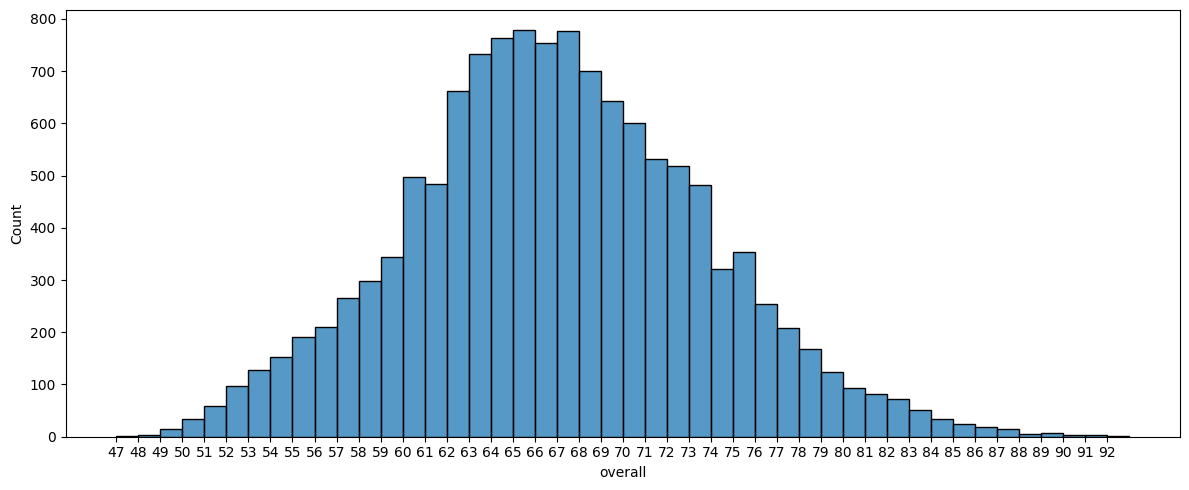

In [13]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

## 2. Mejor equipo del Mundial 2022

In [14]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


## 3. El mejor jugador de cada país en el mundial

C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_13636\87567182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)
C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_13636\87567182.py:6: UserWarning: 
The palette list has fewer values (10) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)


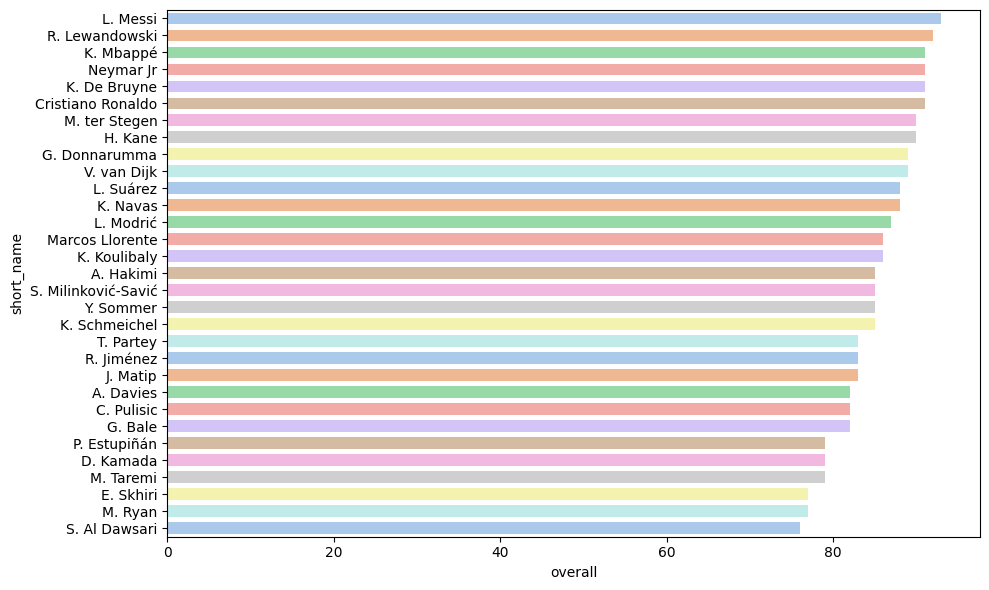

In [15]:
df_best_player = df.copy()
df_best_player = df_best_player.drop_duplicates('nationality_name').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)
plt.show()

## 4. El mejor equipo de cada país

In [16]:
def mejor_equipo(nacionalidad):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name'] == nacionalidad].sort_values(by=['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [17]:
mejor_equipo('Argentina')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
93,L. Martínez,23,Argentina,85,89,Inter,78000000.0,145000.0,ST
177,Á. Correa,26,Argentina,83,86,Atlético de Madrid,48000000.0,80000.0,ST
2913,N. Molina,23,Argentina,73,81,Udinese Calcio,6500000.0,11000.0,RWB
5437,E. Meza,22,Argentina,70,76,Club Atlético Colón,2400000.0,6000.0,RWB
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
33,Á. Di María,33,Argentina,87,87,Paris Saint-Germain,49500000.0,160000.0,RW
412,E. Salvio,30,Argentina,80,80,Boca Juniors,20500000.0,23000.0,RM
617,E. Buendía,24,Argentina,79,84,Aston Villa,26500000.0,61000.0,RM
818,G. Montiel,24,Argentina,78,84,Sevilla FC,21000000.0,23000.0,RB
1083,F. Bustos,25,Argentina,77,80,Club Atlético Independiente,13000000.0,14000.0,RB


Mejor promedio por equipo

In [18]:
mejor_equipo('Argentina')['overall'].mean()

np.float64(80.3)

In [19]:
for team in teams_worldcup:
    print(team, mejor_equipo(team)['overall'].mean())

Qatar nan
France 80.93333333333334
Brazil 81.66666666666667
Germany 80.16666666666667
Portugal 81.73333333333333
Argentina 80.3
Belgium 79.03448275862068
Spain 82.4
Italy 80.83333333333333
Netherlands 78.65517241379311
England 81.3
Mexico 77.45454545454545
Denmark 75.13333333333334
Uruguay 76.6923076923077
Switzerland 74.53571428571429
United States 73.25925925925925
Croatia 76.76
Senegal 74.72727272727273
Iran 69.70588235294117
Japan 73.5925925925926
Morocco 75.92
Serbia 76.26086956521739
Poland 73.11111111111111
South Korea nan
Tunisia 68.57894736842105
Cameroon 72.57894736842105
Canada 68.48
Ecuador 71.07692307692308
Saudi Arabia 68.375
Ghana 72.77777777777777
Wales 70.82142857142857
Costa Rica 70.46666666666667
Australia 70.21428571428571


Sintaxis de una lista de comprension

In [20]:
promedio_puntuacion = [mejor_equipo(team)['overall'].mean() for team in teams_worldcup]
promedio_puntuacion

[nan,
 np.float64(80.93333333333334),
 np.float64(81.66666666666667),
 np.float64(80.16666666666667),
 np.float64(81.73333333333333),
 np.float64(80.3),
 np.float64(79.03448275862068),
 np.float64(82.4),
 np.float64(80.83333333333333),
 np.float64(78.65517241379311),
 np.float64(81.3),
 np.float64(77.45454545454545),
 np.float64(75.13333333333334),
 np.float64(76.6923076923077),
 np.float64(74.53571428571429),
 np.float64(73.25925925925925),
 np.float64(76.76),
 np.float64(74.72727272727273),
 np.float64(69.70588235294117),
 np.float64(73.5925925925926),
 np.float64(75.92),
 np.float64(76.26086956521739),
 np.float64(73.11111111111111),
 nan,
 np.float64(68.57894736842105),
 np.float64(72.57894736842105),
 np.float64(68.48),
 np.float64(71.07692307692308),
 np.float64(68.375),
 np.float64(72.77777777777777),
 np.float64(70.82142857142857),
 np.float64(70.46666666666667),
 np.float64(70.21428571428571)]

In [21]:
df_promedio_puntuacion = pd.DataFrame({'Teams': teams_worldcup, 'Promedio_Puntuacion': promedio_puntuacion})
df_promedio_puntuacion = df_promedio_puntuacion.dropna().sort_values(by='Promedio_Puntuacion', ascending=False)
df_promedio_puntuacion

,Teams,Promedio_Puntuacion
7,Spain,82.400000
4,Portugal,81.733333
2,Brazil,81.666667
10,England,81.300000
1,France,80.933333
8,Italy,80.833333
5,Argentina,80.300000
3,Germany,80.166667
6,Belgium,79.034483
9,Netherlands,78.655172


C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_13636\1060227405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedio_puntuacion[:10], x='Teams', y='Promedio_Puntuacion', palette=sns.color_palette('pastel'), width=0.7)


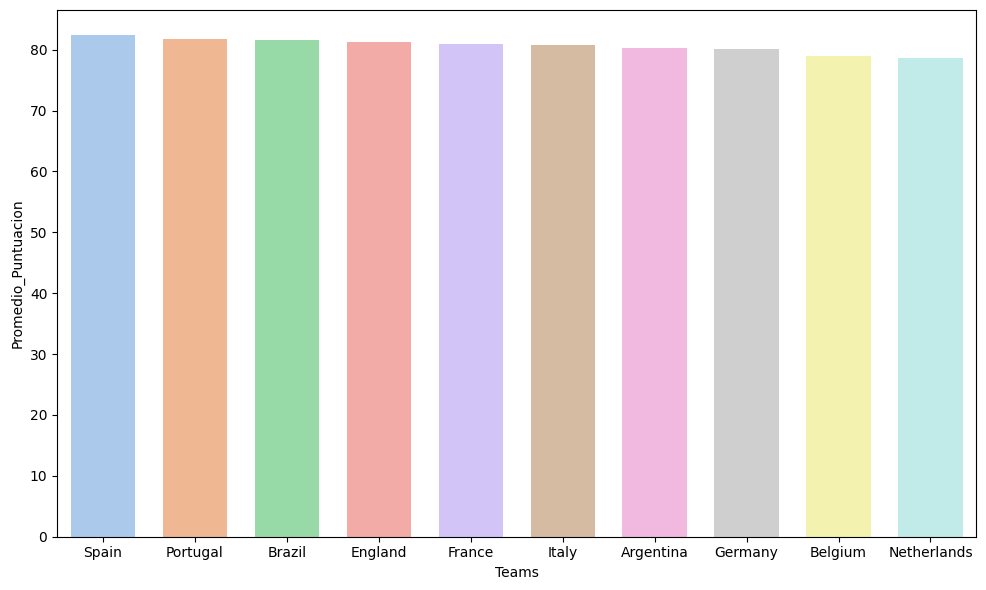

In [22]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
sns.barplot(data=df_promedio_puntuacion[:10], x='Teams', y='Promedio_Puntuacion', palette=sns.color_palette('pastel'), width=0.7)
plt.show()

## 5. El mejor 11 de cada equipo

In [23]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [37]:
def best_lineup(nacionalidad, lineup):
    lineup_count = [lineup.count(i) for i in lineup]
    
    df_lineup = pd.DataFrame({'positions': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['positions'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['positions'].values
    

    df_squad = mejor_equipo(nacionalidad)
    
    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'), 
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [38]:
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
0,L. Messi,93,Paris Saint-Germain,RW
818,G. Montiel,78,Sevilla FC,RB
171,L. Ocampos,83,Sevilla FC,LW
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
206,É. Banega,82,Al Shabab,CDM
247,R. De Paul,82,Atlético de Madrid,CM
413,R. Pereyra,80,Udinese Calcio,CM
269,C. Romero,82,Tottenham Hotspur,CB


In [40]:
for index, row in df_promedio_puntuacion[:10].iterrows():
    max_promedio = None
    for key, values in dict_formation.items():
        promedio = best_lineup(row['Teams'], values)['overall'].mean()
        if max_promedio is None or promedio > max_promedio:
            max_promedio = promedio
            best_formation = key
    print(row['Teams'], best_formation, max_promedio)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
Brazil 4-3-3 84.81818181818181
England 4-4-2 84.45454545454545
France 4-2-3-1 83.9
Italy 4-3-3 84.45454545454545
Argentina 4-3-3 83.0909090909091
Germany 4-2-3-1 84.0
Belgium 4-3-3 82.9090909090909
Netherlands 4-3-3 82.54545454545455
